<div style="border:solid black 2px; padding: 20px">
<b>Ержан, привет!</b>
    
Меня зовут Полина Бережная, и я буду делать ревью твоего проекта. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

    
Мне было очень приятно проверять твой проект, так как чувствуется твое старание и желание сделать задание на достойном уровне. Однако есть некоторые аспекты, которые требуют твоего внимания и доработки. 
    
В тетрадке ты можешь встретить 3 вида моих комментариев:
- <div class="alert alert-danger">
  
    **❌ Комментарий ревьюера**
    
    Такой нюанс требует обязательной доработки, иначе проект не будет принят.
  </div>
    
    
- <div class="alert alert-warning">
  
    **⚠️ Комментарий ревьюера**
    
    Так выделены не обязательные к доработке моменты. Mожешь учесть их при редактировании проекта и выполнении будущих заданий. На твое усмотрение. 
  </div>
    
    
- <div class="alert alert-success">
  
    **✔️ Комментарий ревьюера**
    
    Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    
    
Предлагаю работать над проектом в форме диалога: если ты **что-то меняешь** в работе по моим рекомендациям — **пиши об этом** и помечай комментарий каким-то заметным цветом. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Такой формат работы поможет выполнить повторную проверку твоего проекта оперативнее.
    
Не переживай, если что-то не получилось сделать идеально с первого раза. Основная цель нашей команды - не указать на ошибки, а поделиться своим опытом и помочь тебе отточить аналитические навыки и навыки владения аналитическими инструментами 🙂
    
Жду твой проект на повторное ревью, ты уже почти на финише!
</div>

<div style="border:solid black 2px; padding: 20px">
<b>Ержан, привет еще раз!</b>
    
    
Посмотри, пожалуйста, комментарии v2 🙂

# Исследование оттока клиентов в фитнец-центре

# Цель: провести анализ и подготовить план действий по удержанию клиентов

## Шаг 1. Загрузите данные

In [4]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(13,8)})

In [6]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [7]:
df.sample(20)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1489,0,1,0,0,1,12,0,31,324.09,9.00,4,2.63,2.64,0
2100,1,1,0,0,1,1,0,30,26.25,1.00,0,2.14,1.84,1
348,0,0,0,0,1,1,0,28,94.94,1.00,7,1.90,1.91,0
3607,0,1,1,1,1,12,1,27,162.22,12.00,5,1.00,0.96,0
2513,0,1,1,1,1,12,1,26,96.18,12.00,6,0.64,0.58,0
2844,1,1,1,1,1,6,1,30,34.83,6.00,4,1.99,2.06,0
610,1,1,1,1,1,6,1,31,85.67,6.00,1,1.01,0.73,1
277,0,1,1,1,1,12,1,35,302.88,9.00,4,4.66,4.73,0
401,0,0,1,0,1,1,1,29,176.89,1.00,1,1.43,1.31,0
3485,0,1,1,1,1,1,1,31,221.63,1.00,4,1.70,1.77,0


In [8]:
df.columns.tolist()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

In [9]:
df.columns = [i.lower() for i in df]

In [10]:
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [11]:
df = df[['gender',
         'near_location',
         'partner',
         'promo_friends',
         'phone',
         'group_visits',
         'age',
         'avg_additional_charges_total',
         'contract_period',
         'month_to_end_contract',
         'lifetime',
         'avg_class_frequency_total',
         'avg_class_frequency_current_month',
         'churn']]

Поменял логику столбцов — бинарные признаки рядом с бинарными

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   group_visits                       4000 non-null   int64  
 6   age                                4000 non-null   int64  
 7   avg_additional_charges_total       4000 non-null   float64
 8   contract_period                    4000 non-null   int64  
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [13]:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
group_visits                         0
age                                  0
avg_additional_charges_total         0
contract_period                      0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [14]:
df.duplicated().sum()

0

Дубликаты и пропуски отсутствуют

<div class="alert alert-success">

**Комментарий ревьюера**

Ты отлично владеешь методами первичного изучения и обработки данных 👍🏻

## Шаг 2. Проведите исследовательский анализ данных (EDA)

In [15]:
df.describe()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,contract_period,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,0.41,29.18,146.94,4.68,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,0.49,3.26,96.36,4.55,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,18.00,0.15,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,0.00,27.00,68.87,1.00,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,0.00,29.00,136.22,1.00,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,31.00,210.95,6.00,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,41.00,552.59,12.00,12.00,31.00,6.02,6.15,1.00


<div class="alert alert-danger">

**Комментарий ревьюера**

Что можно сказать о среднестатистическом клиенте?)

Можно увидеть, что портрет среднестатистического клиента - средний возраст 29, средняя подписка - 4.6, в среднем ходят не более 3.7 месяцев,среднее ежемесячное посещение - 1.77, средний месячный отток - 0.27

<div class="alert alert-success">

**Комментарий ревьюера v2**

👍🏻

<div class="alert alert-warning">

**Комментарий ревьюера**

У переменных довольно разные по величине стандартные отклонения. Это говорит о том, что их возможно нужно стандартизировать перед обучением. Для логистической регрессии и дерева это не обязательно, но можно стандартизировать все, а потом уже гонять модели. Стоит указывать на данный нюанс в выводе.

In [16]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

In [17]:
df.groupby('churn').agg('mean').T.style.apply(highlight_min, axis = 1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
contract_period,5.747193,1.728558
month_to_end_contract,5.283089,1.662582


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


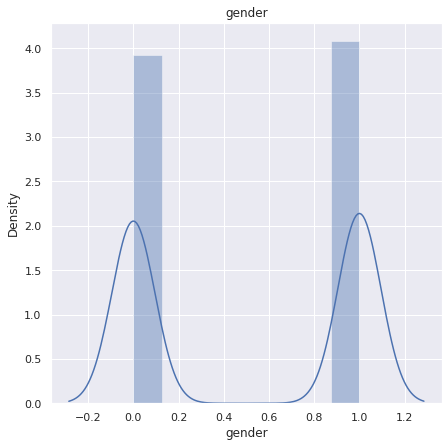

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


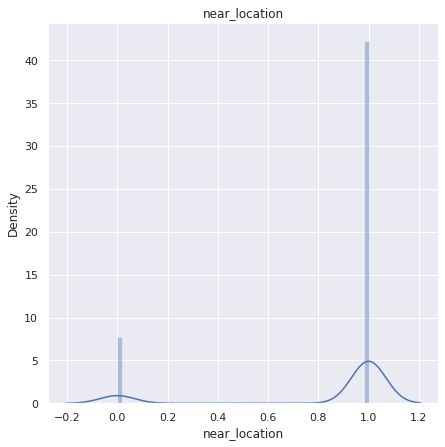

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


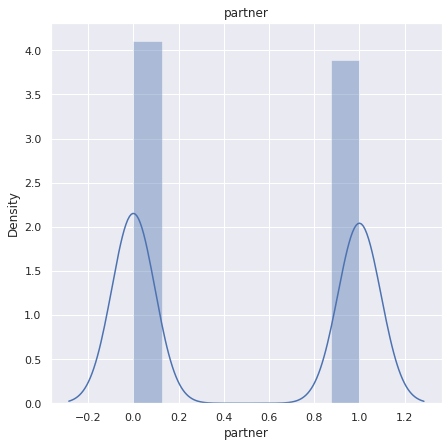

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


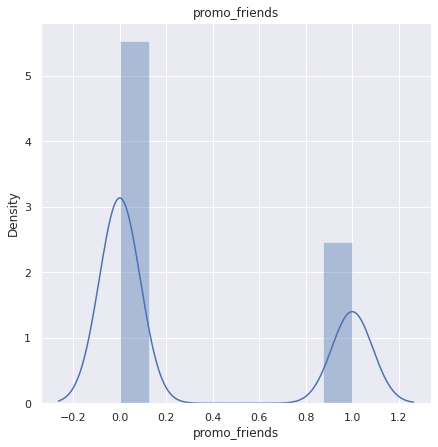

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


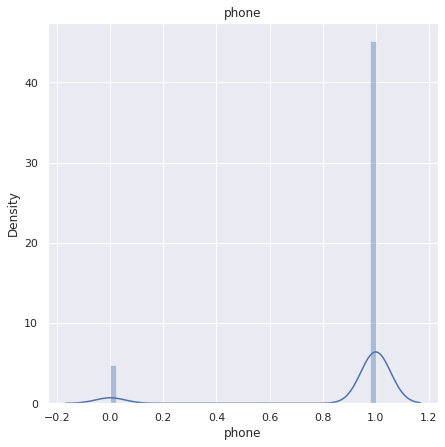

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


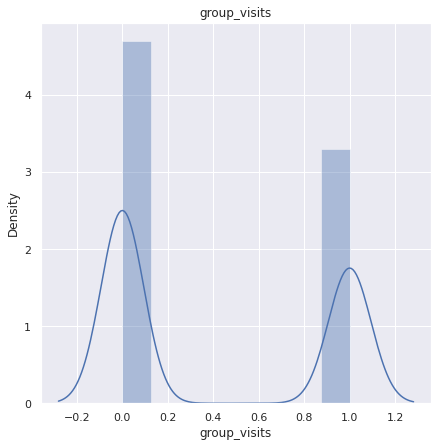

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


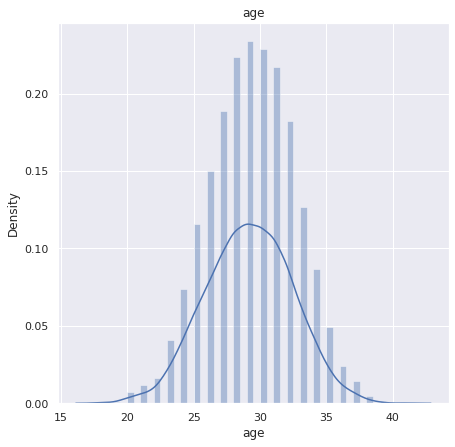

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


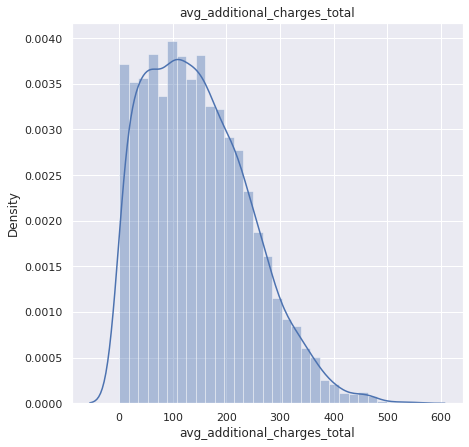

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


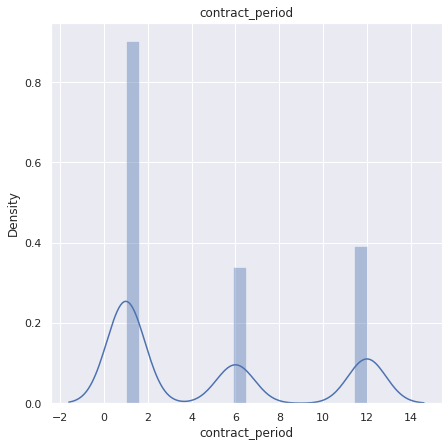

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


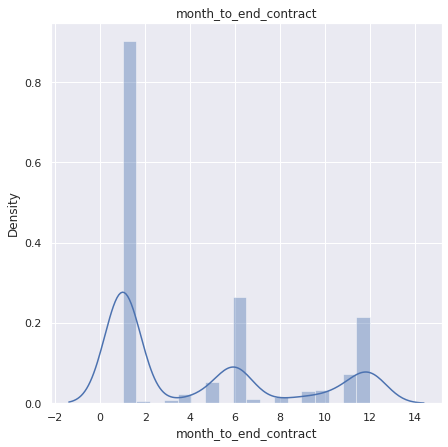

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


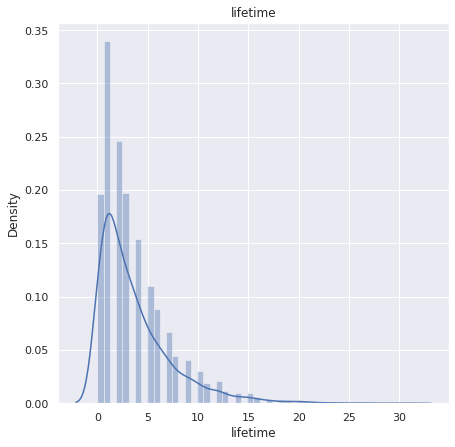

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


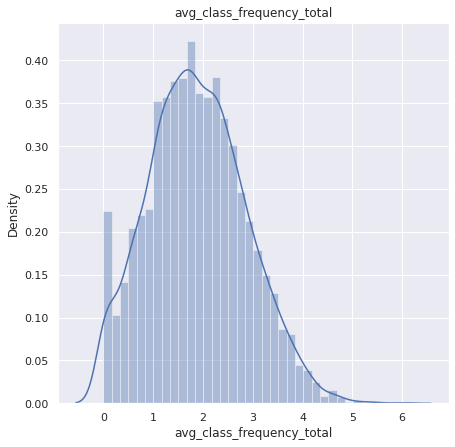

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


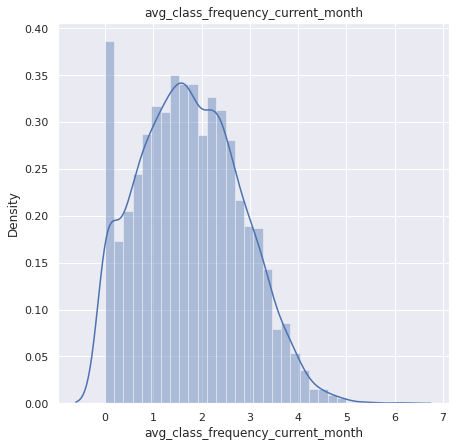

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


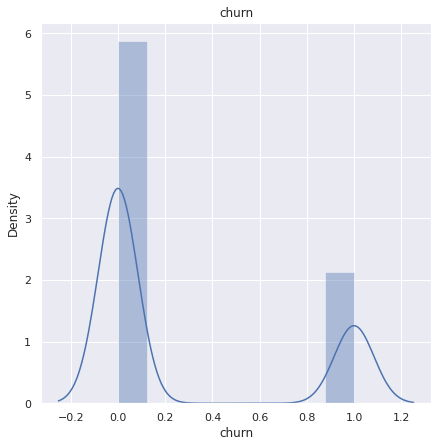

In [18]:
for column in df.columns:
    plt.figure(figsize=(7, 7))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

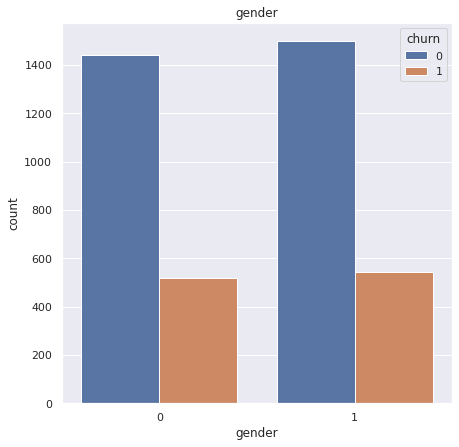

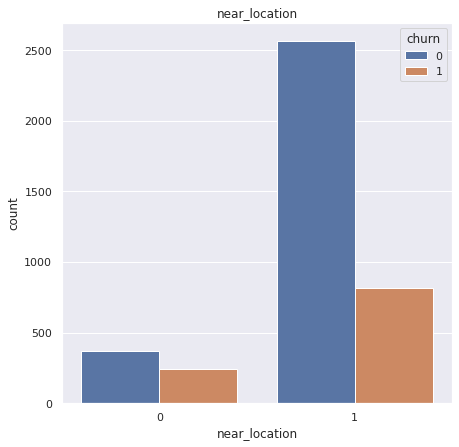

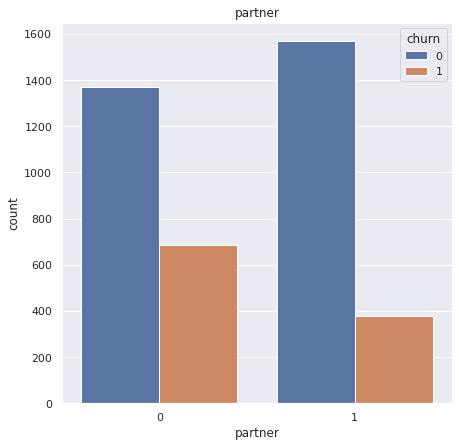

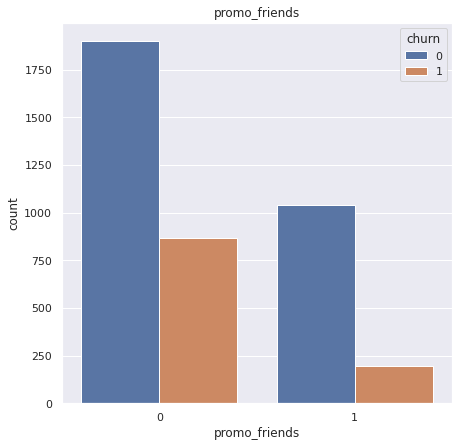

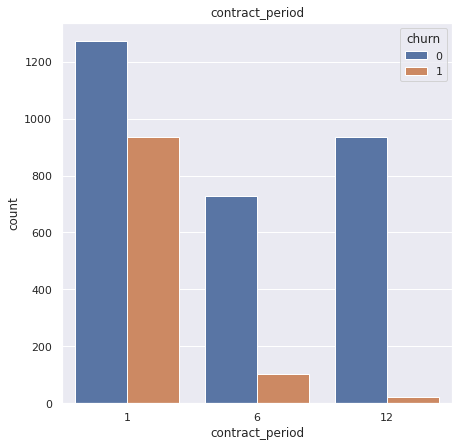

In [19]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

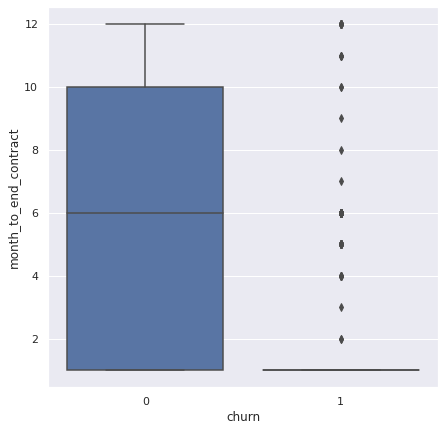

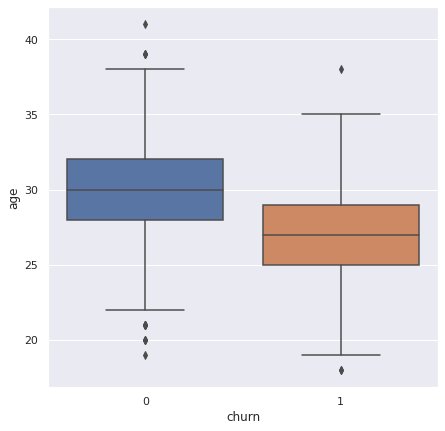

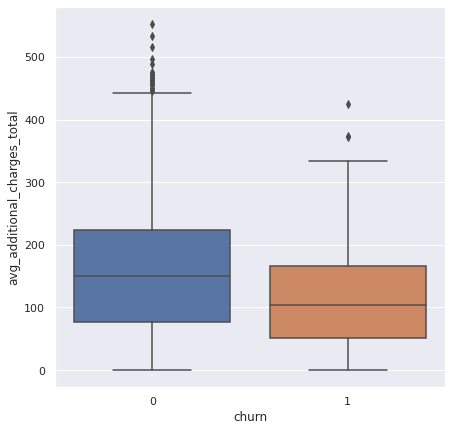

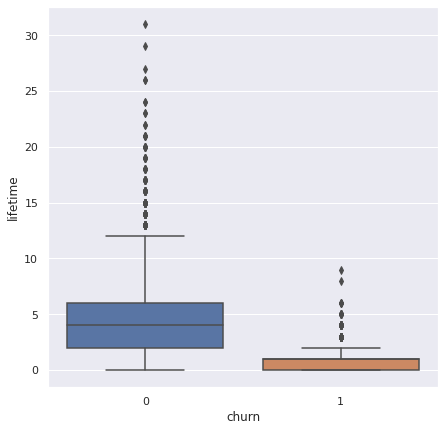

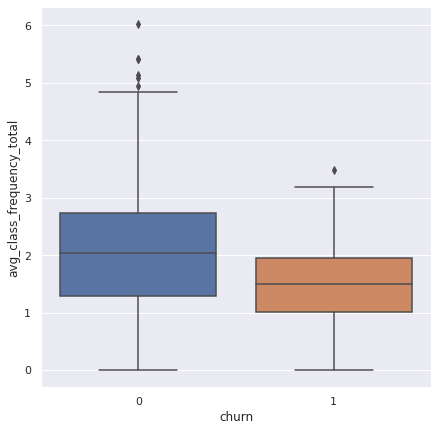

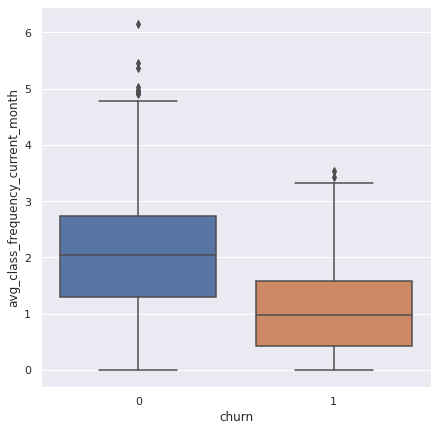

In [20]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()

<div class="alert alert-success">

**Комментарий ревьюера**
    
Эстетичные визуализации 👍🏻

<div class="alert alert-danger">

**Комментарий ревьюера**
    
Какие сходства и различия можно увидеть между классами?)

Самый большой отток составляют мужчины, больше всех приглашают друзей также мужчины, самый большой контрактный период также у мужского пола. В среднем до истечения абонемента - 6 месяцев, среднний возраст у мужчин - 30, у женщин - 26. Самая большая и средняя продолжительность абонемента у мужчин - 4. В среднем мужчины чаще посещают зал

<div class="alert alert-success">

**Комментарий ревьюера v2**

Здорово, что был проанализирован профиль мужчин! Но необходимо описать различия и сходства именно между группой оттока и лояльной группой.

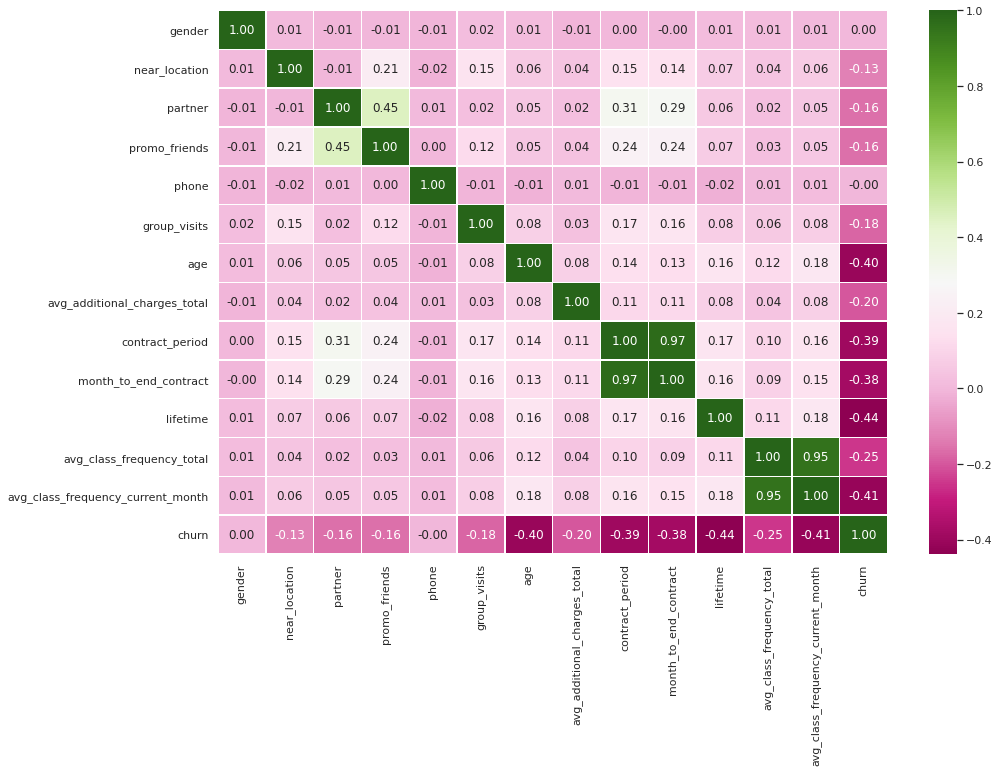

In [21]:
cm = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

Есть мультиколлинеарные признаки:
contract_period - month_to_end_contract
avg_class_frequency_current_month - avg_class_frequency_total

Есть признаки с нулевой корреляцией с целевой переменной:
phone
gender

<div class="alert alert-success">

**Комментарий ревьюера**
    
Все верно! В рамках данного проекта достаточно просто обозначить факт высокой корреляции между признаками. Но в будущем можно попробовать бороться с мультиколлинеарностью:
    
- Удалить по одному признаку из пары.
- Преобразовать признаки.
- Использовать регуляризацию.

## Шаг 3. Постройте модель прогнозирования оттока пользователей

In [22]:
X = df.drop('churn', axis = 1)
y = df['churn']

### Логистическая регрессия

<div class="alert alert-warning">

**Комментарий ревьюера**

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:

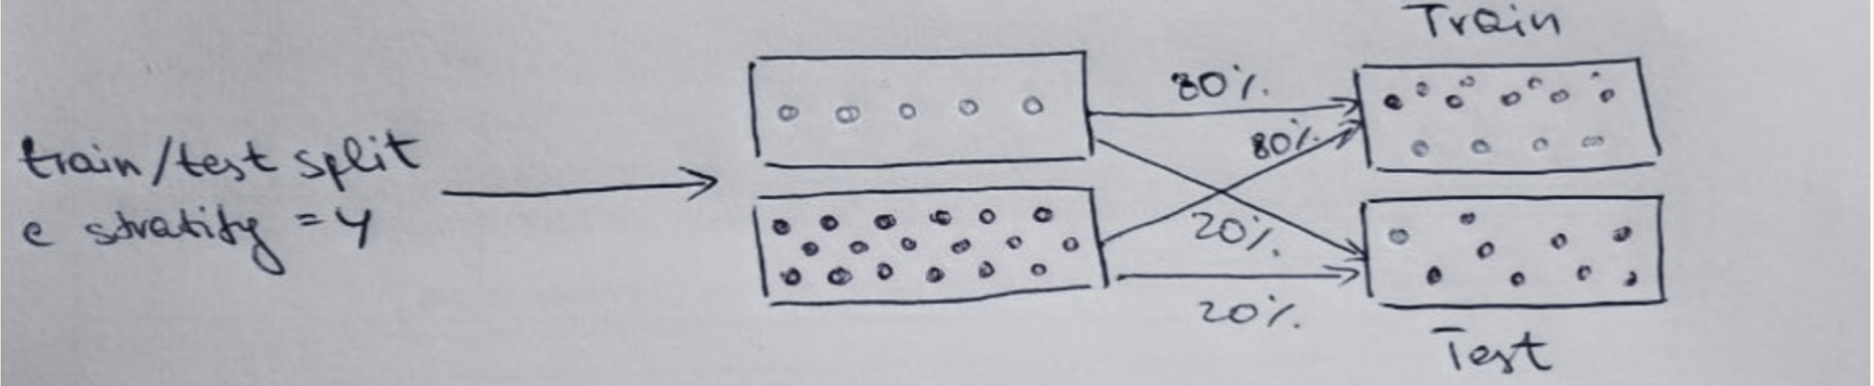
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.

Функция train_test_split( ) строена так, что мы не сталкиваемся с подобной проблемой. Но я все же пишу про этот параметр, чтобы обратить внимание на проблему дисбаланса :)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [27]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy | Нет баланса классов: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


### Случайный лес

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [29]:
print('Accuracy | Нет баланса классов: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy | Нет баланса классов: 0.91
Precision: 0.83
Recall: 0.81
F1: 0.82


<div class="alert alert-danger">

**Комментарий ревьюера**
    
Какую модель в итоге выберем?

<div class="alert alert-success">

**Комментарий ревьюера v2**

Супер 👍🏻

Выберем модель Случайный лес, потому что precision больше

<div class="alert alert-success">

**Комментарий ревьюера**
    
В целом, этап выполнен абсолютно корректно! Молодец :)

## Шаг 4. Сделайте кластеризацию пользователей

In [30]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [31]:
linked = linkage(df_sс, method = 'ward')

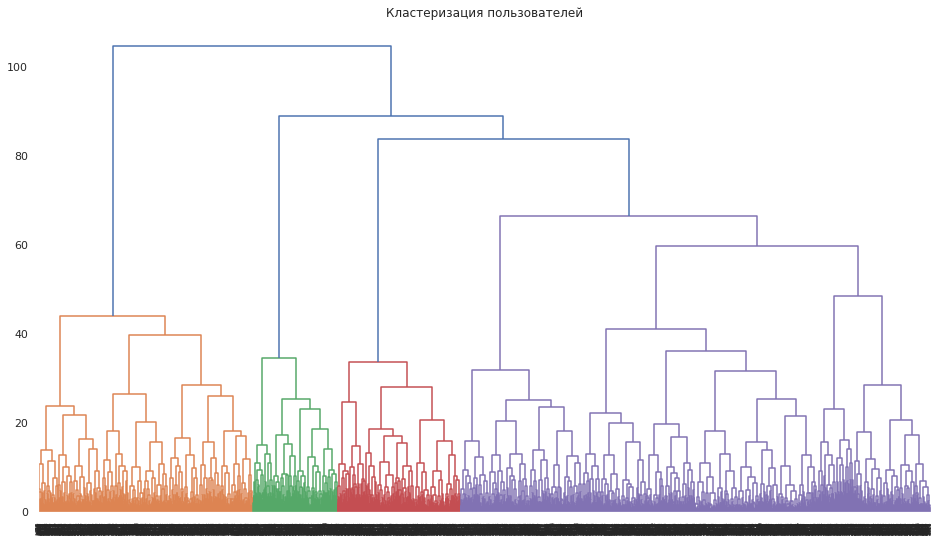

In [32]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Предположим, что кластеров 5

<div class="alert alert-success">

**Комментарий ревьюера**
    
Согласна :)

<div class="alert alert-danger">

**Комментарий ревьюера**
    
- В функции KMeans( ) необходимо указать random_state, иначе кластеры будут формироваться каждый раз по-разному. Поправь, пожалуйста, и проанализируй изменения :)
    
- Также прошу тебя подробнее описать профили разных кластеров.

<div class="alert alert-success">

**Комментарий ревьюера v2**
    
Теперь обучение проходит верно!

Не совсем понимаю как описать профили по кластерам

In [40]:
km = KMeans(n_clusters = 5, random_state=100)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [41]:
df.cluster.value_counts()

4    1236
3    1015
1     856
2     507
0     386
Name: cluster, dtype: int64

In [42]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.52,0.55,0.50,0.50,0.49
near_location,0.86,0.98,0.00,0.96,1.00
partner,0.47,0.35,0.46,0.78,0.35
promo_friends,0.31,0.23,0.08,0.57,0.24
phone,0.00,1.00,1.00,1.00,1.00
group_visits,0.43,0.47,0.22,0.54,0.34
age,29.30,30.11,28.48,29.98,28.14
avg_additional_charges_total,144.21,162.09,135.63,160.82,130.55
contract_period,4.78,2.57,2.38,10.88,1.96
month_to_end_contract,4.47,2.37,2.22,9.94,1.87


В среднем слабее оттекают кластеры 0 и 2.
Кластеры не равнозначны по количеству клиентов и по доле оттока
Живо оттекают из номера 3, одинаково из 1 и 4.

churn 0.08 0.26 0.02 0.56 0.27

Признаки "хороших кластеров":


возрастом — он больше

2 кластер выделяется длительностью абонемента

оба кластера выделяются временем с момента первого обращения — ходят давно

большими расходами на доп. услуги

средняя частота посещений в неделю за предыдущий месяц у них тоже выже

<div class="alert alert-danger">

**Комментарий ревьюера v2**

А что можно сказать о склонных к оттоку клиентах?) Есть ли сходства между двумя группами?

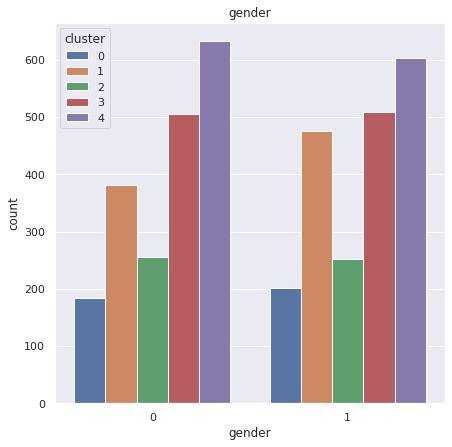

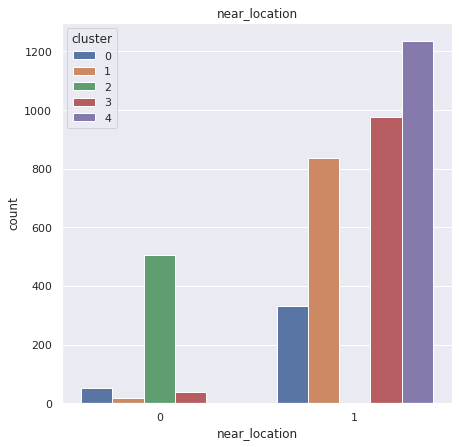

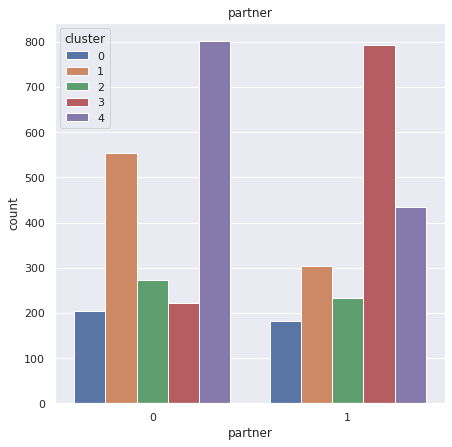

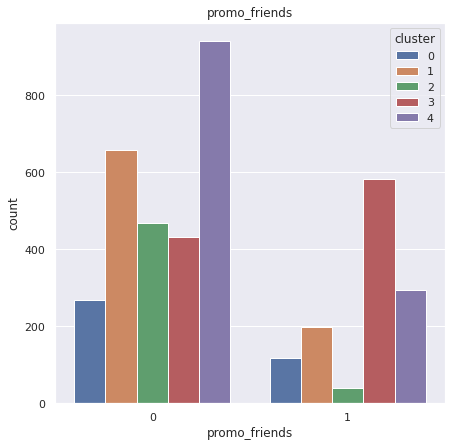

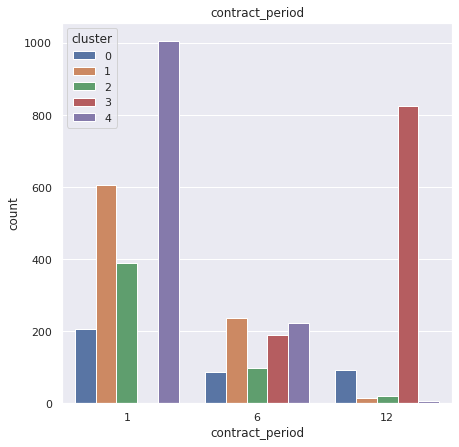

In [43]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

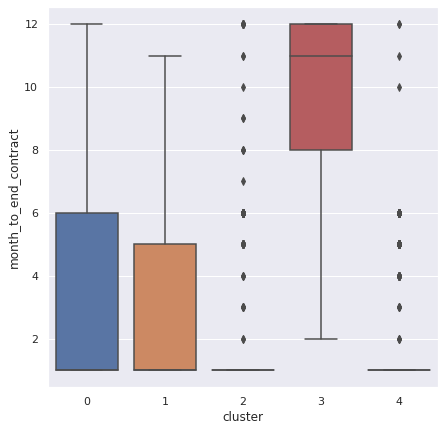

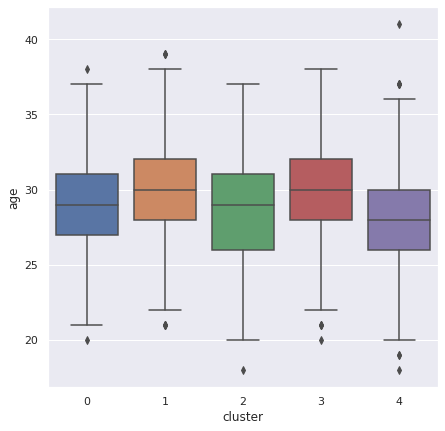

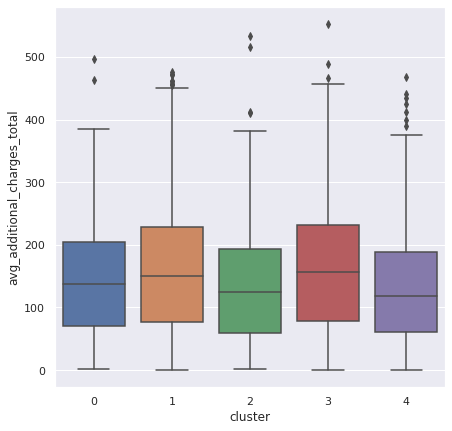

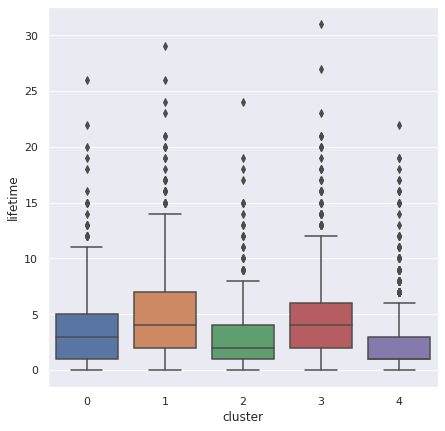

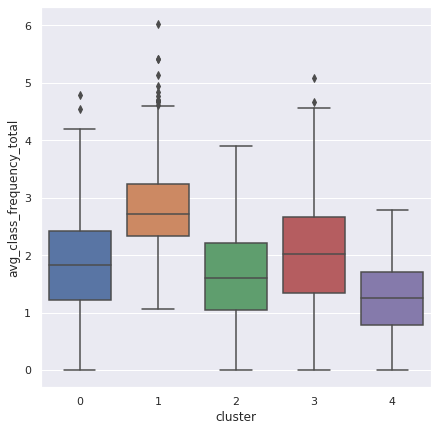

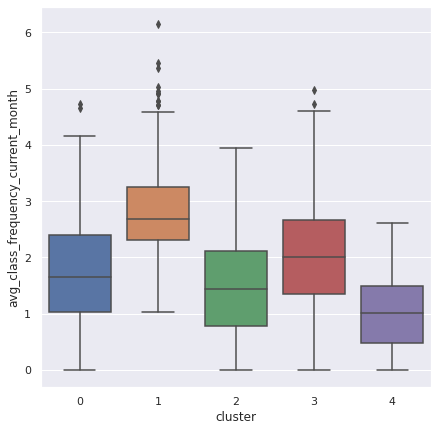

In [44]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Рекомендации:

Для закупки трафика и привличения пользователей использовать лук-элайк аудитории из "хороших кластеров".

Поддерживать и мотивировать "хорошие кластеры".

Глубже сегментировать оттекающих, к каждому сегменту тестировать индивидуальные предложения.

Выстроить предиктивную систему аналитики и действовать не после оттока, а до него.

<div class="alert alert-danger">

**Комментарий ревьюера**
    
Было бы здорово добавить краткое резюме исследования, а также предложить 3-4 конкретных маркетинговых действий (у нас уже есть индивидуальные предложения) как указано в задании :)

<div class="alert alert-danger">

**Комментарий ревьюера v2**
    
Не вижу особых изменений :)
    
Давай постараемся описать:
- качество данных
- результаты исследовательского анализа данных
- результаты обучения